<a href="https://colab.research.google.com/github/RittickSR/marketPredictions/blob/master/modelVersions/Preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Version 2.0
After v1.0 of stock pred i decided that simple multiple regression on historical stock data was insufficient as the stock market being such a volatile enviorment may drastically change in a day irrespective of the previous conditions. Hence, we need something more sophisticated to mimic a real world scenario. So, I have decided to use NLP(Natural Language Processing) to do sentiment analysis of news headlines and then correlate that data to our previous regression model to give it a greater edge.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
import csv
import sys

In [ ]:
rel_name='Reliance '
csv_file=csv.reader(open('/content/drive/My Drive/india-news-headlines.csv',"rt"),delimiter=',')
i=0
df=[]
col_names=['Date','Headlines']
for row in csv_file:
  dt=[]
  if (rel_name in row[2]) or (rel_name.upper() in row[2]) or (rel_name.lower() in row[2]):
    dt.append(row[0])
    dt.append(row[2])
    if dt not in df:
      df.append(dt)

In [ ]:
print(len(df))

1709


So, after removing the headline category we get the headline date and text which is then added to a list 'dt'. We then check this dt in dx for matching values,i.e repetition of headlines which is unwanted for our model. After removing healine category and repeated headlines we append these to 'df' to get a list of lists containing 1709 examples. Now we will use our previous dataset of historical stock price data to obtain the difference in stock price of the day on which the headline occured and the previous day


> I am using the previous day and not the next day as in this project to remove ambiguity of timing I am considering the headlines to be out at around the same time as the daily newspaper which is around 7:30-8:00 am (in Mumbai) and the NSE opens at 9:15 am. Hence the investors will have read the headline and their decisions will affect the share on the day of the headline and not the next.


I will add a '1' for increase in share price and a '0' for decrease in share price



In [ ]:
rel_data=csv.reader(open('/content/drive/My Drive/RELIANCE.csv','rt'),delimiter=',')
dx=[]
for row in rel_data:
  di=[]
  row[0]=row[0].replace('-','')
  di.append(row[0])
  di.append(row[3])
  di.append(row[4])
  dx.append(di)

In [ ]:
dx.pop(0)
print(dx)

[['20000103', '233.05', '237.5'], ['20000104', '251.7', '258.4'], ['20000105', '271.85', '256.65'], ['20000106', '282.5', '289.0'], ['20000107', '294.35', '295.0'], ['20000110', '314.55', '317.4'], ['20000111', '308.5', '307.95'], ['20000112', '288.5', '289.0'], ['20000113', '301.7', '306.0'], ['20000114', '311.85', '309.5'], ['20000117', '316.3', '318.25'], ['20000118', '308.75', '309.0'], ['20000119', '314.2', '322.85'], ['20000120', '319.6', '320.0'], ['20000121', '312.85', '312.7'], ['20000124', '326.35', '325.5'], ['20000125', '326.15', '325.05'], ['20000127', '319.95', '329.0'], ['20000128', '334.95', '335.9'], ['20000131', '338.35', '334.45'], ['20000201', '328.15', '330.8'], ['20000202', '334.05', '342.9'], ['20000203', '340.15', '342.0'], ['20000204', '341.65', '344.0'], ['20000207', '344.15', '341.1'], ['20000208', '343.6', '345.5'], ['20000209', '342.4', '349.0'], ['20000210', '350.4', '348.8'], ['20000211', '355.75', '364.0'], ['20000214', '363.3', '359.0'], ['20000215', '3

In [ ]:
rel_data=csv.reader(open('/content/drive/My Drive/RELIANCE.csv','rt'),delimiter=',')
tar=[]
for row in rel_data:
  tart=[]
  row[0]=row[0].replace('-','')
  tart.append(row[0])
  tart.append(row[5])
  tar.append(tart)

In [ ]:
tar.pop(0)
print(tar)

[['20000103', '251.7'], ['20000104', '271.85'], ['20000105', '287.9'], ['20000106', '300.7'], ['20000107', '317.9'], ['20000110', '318.7'], ['20000111', '310.95'], ['20000112', '305.0'], ['20000113', '316.4'], ['20000114', '321.65'], ['20000117', '322.9'], ['20000118', '318.95'], ['20000119', '324.9'], ['20000120', '324.9'], ['20000121', '328.4'], ['20000124', '331.85'], ['20000125', '325.3'], ['20000127', '336.8'], ['20000128', '341.9'], ['20000131', '336.0'], ['20000201', '337.45'], ['20000202', '346.9'], ['20000203', '343.5'], ['20000204', '347.35'], ['20000207', '349.45'], ['20000208', '346.9'], ['20000209', '354.65'], ['20000210', '363.8'], ['20000211', '374.0'], ['20000214', '360.9'], ['20000215', '354.4'], ['20000216', '353.8'], ['20000217', '356.8'], ['20000218', '357.95'], ['20000221', '352.0'], ['20000222', '347.0'], ['20000223', '344.7'], ['20000224', '340.7'], ['20000225', '342.9'], ['20000228', '337.25'], ['20000229', '342.85'], ['20000301', '329.85'], ['20000302', '322.0'

I am also assuming that any headlines not having Reliance or for that matter any company 'x' in the headline doesn't affect the share prices which is obviously not true. As one of my favourite author Yuval Noah Harari said that the stock market is most complex machine humanity has ever created even a small change somewhere could produce unprecedented changes in the market.
So there could be potentially infinite factors affecting the stock market and the shares that we are intrested in. So, for the sake of my sanity I am restricting myself to just the headlines having the company 'x' in the headline.

In [ ]:
j=[]
for x in df:
  for i in tar:
    if(x[0]==i[0]):
      
      if(j[1]>i[1]):
        x.append(0)
      else:
        x.append(1)
    j=i

In [ ]:
for x in df:
  print(x)

So I have obtained the nessecary data by doing a bit of merging and manipulation of datasets. I combined the share prices dataset with the headlines dataset by comparing the dates of the headlines with the dates of the share prices and not the other way round as the headlines are sparser. After that I compared the previous day's price and the next day's price to obtain a net increase or decrease signified by 1 or 0

> 1 signifies an increase in the high whereas 0 signifies a decrease. Hence we have obtained the positive or negetive labels for our company

*Note: I can perhaps add healines from major competitors of Reliance in the fray and then check the share prices of our company. This will reduce generilizability of the preprocessing steps but may result in increased accuracy*



In [ ]:
for i in df:
  if(len(i)==2):
    df.remove(i)

In [ ]:
for i in df:
  if (len(i)==2):
    print(i)

In [ ]:
import matplotlib as plt
wc={}
for x in df:
  for i in x[1].split(' '):
    if i not in wc:
      wc[i]=1
    else:
      wc[i]=wc[i]+1

Now, I hav created a dictionary contaning all the words and the frequency with which they occur in our healines as we can see Reliance occurs the maximum of 1203 times however it may be eliminated as it all headlines will definetly contain the term reliance hence making it overall redundant.

In [ ]:
del wc['Reliance']
print(wc)

In [ ]:
sorted_wc=sorted(wc.items(), key=lambda x: x[1], reverse=True)
print(sorted_wc)

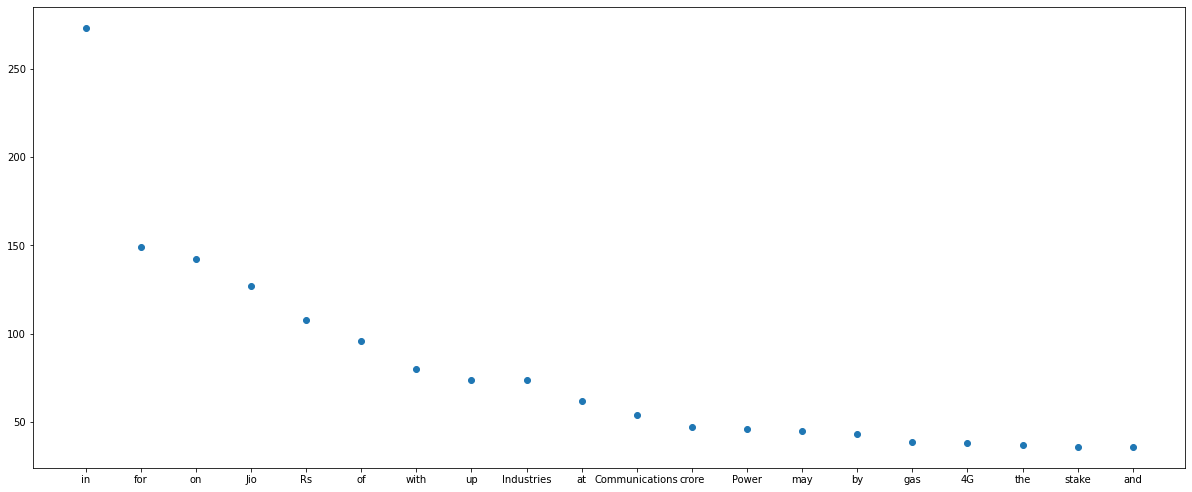

In [ ]:
x, y = zip(*sorted_wc)
fig=plt.pyplot.figure(figsize=(20,8))
axes=fig.add_axes([0.1,0.1,0.8,0.8])
axes.scatter(x[1:21],y[1:21])
fig.show()

So, words such as in, for, on etc take up most of the count. Words like these are important for grammar but pretty usless in NLP as they give contextual information and are only present to provide grammatical correctness to our sentences. Hence I need to remove these words which convey almost 0 contextual information.

In [ ]:
import nltk
nltk.download('stopwords')


In [ ]:
nltk.download('punkt')
from nltk.corpus import stopwords

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
all_stopwords = stopwords.words('english')
all_stopwords.append('Reliance')
for x in df:
  txt_tokens=nltk.tokenize.word_tokenize(x[1])
  tokens_without_sw = [word for word in txt_tokens if not word in all_stopwords]
  x[1]=tokens_without_sw
print(df)

Now, I have removed the stop words now let's plot the data after removal of stop words and company name

In [ ]:
import matplotlib.pyplot as plt
wc={}
for x in df:
  for i in x[1]:
    if i not in wc:
      wc[i]=1
    else:
      wc[i]=wc[i]+1
print(wc)

[(';', 310), ('Jio', 153), (':', 152), ('Rs', 109), ('Industries', 91), ("'s", 84), ('Communications', 61), ("'", 57), ('%', 56), ('Power', 55), ('crore', 50), ('may', 45), ('gas', 40), ('4G', 39), ('stake', 36), ('$', 36), ('000', 35), ('India', 35), ('plans', 33), ('deal', 31), ('Retail', 31), ('Info', 29), ('3', 28), ('1', 27), ('gets', 26), ('Infocomm', 26), ('launch', 26), ('cr', 25), ('MF', 25), ('Airtel', 25), ('set', 24), ('Energy', 24), ('net', 23), ('Life', 23), ('oil', 22), ('Capital', 22), ('Mumbai', 22), ('shares', 21), ('reliance', 21), ('buy', 21), ('market', 20), ('says', 20), ('power', 20), ('plan', 20), ('Infra', 20), ('nod', 19), ('invest', 19), ('buys', 19), ('IPO', 19), ('Govt', 18), ('plant', 18), ('SC', 18), ('project', 17), ('&', 17), ('new', 17), ('offer', 17), ('launches', 17), ('BSNL', 16), ('case', 16), ('services', 16), ('Telecom', 16), ('Ambani', 16), ('talks', 16), ('2G', 16), ('Group', 16), ('seeks', 15), ('10', 15), ('2', 15), ('service', 15), ('profit'

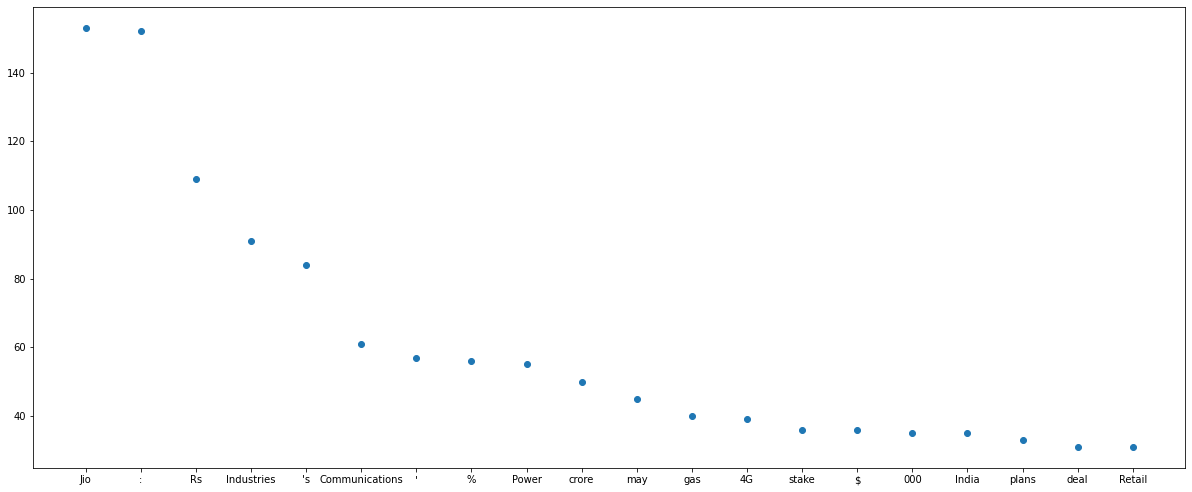

In [ ]:
srted_wc=sorted(wc.items(), key=lambda x: x[1], reverse=True)
print(sorted_wc)
x, y = zip(*sorted_wc)
fig=plt.figure(figsize=(20,8))
axes=fig.add_axes([0.1,0.1,0.8,0.8])
axes.scatter(x[1:21],y[1:21])
fig.show()o

So as seen above symbols and numbers are occupying the most part of the data so I need to clear these out

In [ ]:
lis=['\'','\'s',':','%','$','000',';',',','Rs']
for x in df:
  for i in x[1]:
    if (any(y in i for y in lis) or (len(i)<=1)):
      x[1].remove(i)

[('Jio', 153), ('Industries', 91), ('Communications', 61), ('Power', 55), ('crore', 50), ('may', 45), ('gas', 40), ('4G', 39), ('stake', 36), ('India', 35), ('plans', 33), ('deal', 31), ('Retail', 31), ('Info', 29), (';', 28), ('gets', 26), ('Infocomm', 26), ('launch', 26), ('cr', 25), ('MF', 25), ('Airtel', 25), ('set', 24), ('Energy', 24), ('net', 23), ('Life', 23), ('oil', 22), ('Capital', 22), ('Mumbai', 22), ('shares', 21), ('reliance', 21), ('buy', 21), ('market', 20), ('says', 20), ('power', 20), ('plan', 20), ('Infra', 20), ('nod', 19), ('invest', 19), ('buys', 19), ('IPO', 19), ('Govt', 18), ('plant', 18), ('SC', 18), ('project', 17), ('new', 17), ('offer', 17), ('launches', 17), ('BSNL', 16), ('case', 16), ('services', 16), ('Telecom', 16), ('Ambani', 16), ('talks', 16), ('2G', 16), ('Group', 16), ('seeks', 15), ('10', 15), ('service', 15), ('profit', 15), ('Sensex', 15), ('Anil', 15), ('sell', 15), ('Infrastructure', 15), ('spectrum', 15), ('Comm', 14), ('Vodafone', 14), ('D

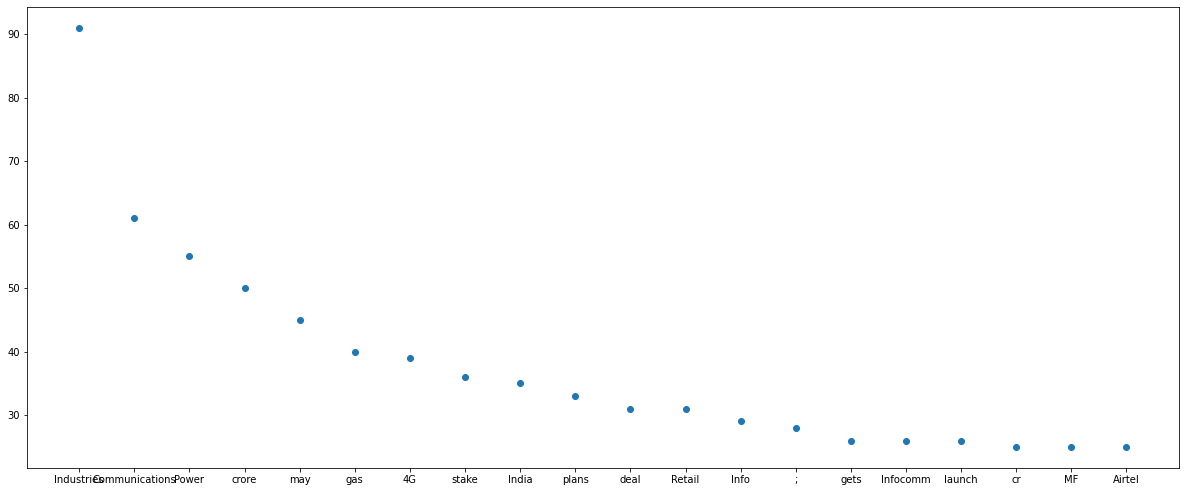

In [ ]:
wc={}
for x in df:
  for i in x[1]:
    if i not in wc:
      wc[i]=1
    else:
      wc[i]=wc[i]+1
sorted_wc=sorted(wc.items(), key=lambda x: x[1], reverse=True)
print(sorted_wc)
x, y = zip(*sorted_wc)
fig=plt.figure(figsize=(20,8))
axes=fig.add_axes([0.1,0.1,0.8,0.8])
axes.scatter(x[1:21],y[1:21])
fig.show()

In [ ]:
with open('pre_processed.csv', 'w', newline='') as f:
    writer = csv.writer(f)
    writer.writerows(df)

**CHECKPOINT!!** 

I think all the required preprocessing is done now all that remains is to build a neural network and let it do it's work


